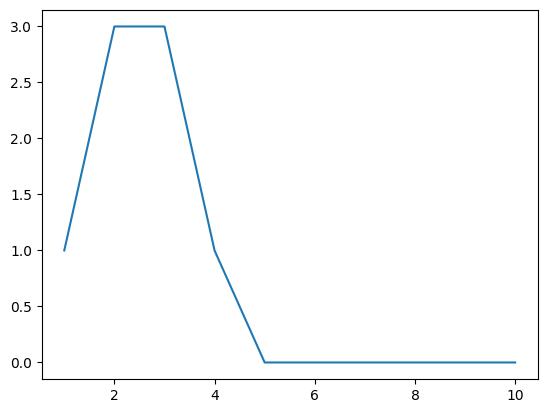

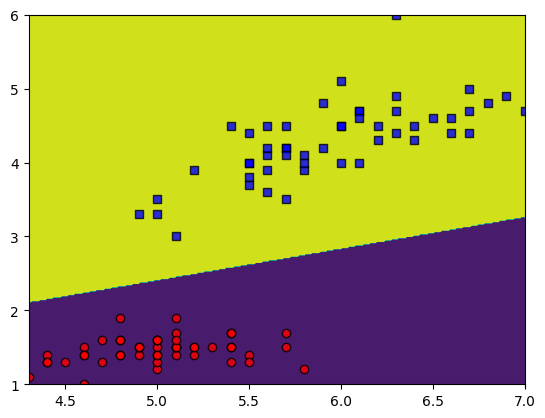

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


class Perceptron:


    def __init__(self, eta=0.1, num_iter=50, random_state=1):
        self.eta = eta
        self.num_iter = num_iter
        self.random_state = random_state

    
    def fit(self, X, y):
        regen = np.random.RandomState(self.random_state)
        self.w_ = regen.normal(loc=0.0, scale=0.01,size=X.shape[1])
        
        self.b_ = np.float_()
        self.errors_ = []

        for i in range(self.num_iter):
            error = 0
            for xi, target in zip(X,y):
                deffrence = self.eta * (target - self.predict(xi))
                self.w_ += xi * deffrence
                self.b_ += deffrence
                error += int(deffrence != 0)

            self.errors_.append(error)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_



    def predict(self , X):
        return  np.where(self.net_input(X) > 0.0 , 1 , 0)
    
def plot_decision_regions(X, Y, classifier, n_items=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique([1,0]))])
    
    x1_min , x1_max = min(X[:, 0]) , max(X[:,0]) 
    x2_min , x2_max = min(X[:, 1]) , max(X[:,1]) 

    xx1 , xx2 = np.meshgrid( 
        np.linspace(x1_min , x1_max, n_items),
        np.linspace(x2_min , x2_max, n_items)
    )

    lab = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T )


    lab = lab.reshape(xx1.shape)


    plt.contourf(xx1, xx2,  lab)


    for idx, cl in enumerate(np.unique(y)):
        XCL = np.array([])
        for id, row  in enumerate(X) :
            if y[id] == cl:
                if len(XCL)==0:
                    XCL= np.array([row])
                else:
                    XCL = np.insert(XCL, len(XCL) , row  , axis=0 )

        

        plt.scatter(x= np.array(XCL[:, 0]),
                    y=np.array(XCL[:, 1]),
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')





if __name__=="__main__":
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


    frame = pd.read_csv(s)

    y =  frame.iloc[0:100, 4].values
    y =  np.where(y == 'Iris-setosa', 0, 1)


    X = frame.iloc[0:100 , [0,2]].values


    ppn = Perceptron(0.2 , 10 , 2)

    ppn.fit(X, y)

    plt.plot(range(1 , len(ppn.errors_) + 1), ppn.errors_)
    plt.show()


    plot_decision_regions(X, y, ppn , 300)











